# Финальное задание

In [1]:
import pandas as pd
import numpy as np
import math
import time
import datetime
from matplotlib import pyplot as plt
from sklearn import *

In [8]:
# считываем данные обучения и теста

train = pd.read_csv('features.csv', index_col='match_id')
test = pd.read_csv('features_test.csv', index_col='match_id')

y = train['radiant_win']
# дропаем колонки, которых нет в тестовой выборке

for col in train.columns:
    
    if col not in test.columns:
        
        print(col)
        train.drop(col, axis = 1, inplace = True)


duration
radiant_win
tower_status_radiant
tower_status_dire
barracks_status_radiant
barracks_status_dire


In [9]:
# выясняем, в каких колонках пропуски

for i in range (0, train.shape[1]):
    
    if train.count()[i] != train.shape[0]:
        
        print(train.columns[i])

first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire_first_ward_time


In [10]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)
X = train

# а теперь дропну те колонки, которые считаю вообще тут не нужными (может чуток и не по заданию, зато это разумно)

X.drop('start_time', axis = 1, inplace = True)

In [104]:
# собственно, проходим заданные количества деревьев (trees), делаем cv и запоминаем скор
trees = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70]
roc_auc_gb = []
cv = model_selection.KFold(random_state = 1, shuffle = True, n_splits = 5)


for n_trees in trees:
    
    gb = ensemble.GradientBoostingClassifier(n_estimators = n_trees, random_state = 1)
    
    start_time = datetime.datetime.now()
    
    k = model_selection.cross_val_score(estimator = gb, cv = cv, X = X, y = y, scoring = 'roc_auc')
    
    print('Trees number: {}. Time elapsed: {}'.format(n_trees, datetime.datetime.now() - start_time))
    
    roc_auc_gb.append(np.mean(k))

Trees number: 5. Time elapsed: 0:00:21.723460
Trees number: 10. Time elapsed: 0:00:47.739514
Trees number: 15. Time elapsed: 0:01:01.685964
Trees number: 20. Time elapsed: 0:01:17.587340
Trees number: 25. Time elapsed: 0:01:39.119805
Trees number: 30. Time elapsed: 0:01:53.362561
Trees number: 40. Time elapsed: 0:02:36.461325
Trees number: 50. Time elapsed: 0:03:23.463129
Trees number: 60. Time elapsed: 0:04:05.144552
Trees number: 70. Time elapsed: 0:04:55.758453


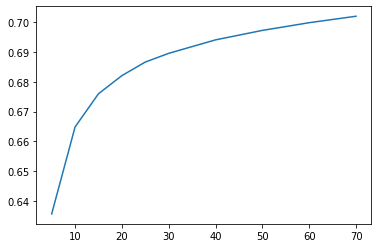

In [105]:
# смотрим как roc_auc зависит от количества деревьев

plt.plot(trees, roc_auc_gb)

# Отчет по 1 подходу

## 1:

Признаки:

first_blood_time, first_blood_team, first_blood_player1, first_blood_player2, radiant_bottle_time, radiant_courier_time, radiant_flying_courier_time, radiant_first_ward_time, dire_bottle_time, dire_courier_time, dire_flying_courier_time, dire_first_ward_time.

Почему именно они:

Потому что фб за 5 минут могло и не быть (что реально при пассивной игре), потому что ботл никто не купил (что опять же вполне реально), либо сапорты в команде уроды (не купили ни вардов, ни куру).

## 2:

Целевая переменная - radiant_win в train датафрейме. Остальные колонки (которые про бараки) заглядывают в будущее и их надо дропать. То есть идет оценивание вероятности победы по показателям первых пяти минут.

## 3:

На 30 деревьях процесс шел примерно 2 минуты. Roc_auc при этом - примерно 0.69.

## 4: 

Можно увеличивать количество деревьев и дальше, но если есть вычислительные мощности. Но нам и так сойдет. Можно распараллеливать процесс обучения с разным количеством деревьев (то есть с одним количеством - на 1 ядре, с другим - на другом, так как один процесс вычисляется строго последовательно).

In [11]:
X = train
# X.drop(['start_time'], axis = 1, inplace = True)
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)

In [125]:
# пробуем разные константы регуляризации (без 0, там страх и ужас)
Cs = np.arange(0.5, 10, 0.5)
roc_auc_lr = []

for C in Cs:
    
    lr = linear_model.LogisticRegression(C = C, random_state = 1)
    
    start_time = datetime.datetime.now()
    
    k = model_selection.cross_val_score(estimator = lr, cv = cv, X = X, y = y, scoring = 'roc_auc')
    
    if int(C) == C:
        
        print('Regularization coef: {}. Time elapsed: {}'.format(round(C, 2), datetime.datetime.now() - start_time))
    
    roc_auc_lr.append(np.mean(k))

Regularization coef: 1.0. Time elapsed: 0:00:03.454415
Regularization coef: 2.0. Time elapsed: 0:00:03.514553
Regularization coef: 3.0. Time elapsed: 0:00:03.580119
Regularization coef: 4.0. Time elapsed: 0:00:03.369371
Regularization coef: 5.0. Time elapsed: 0:00:03.852658
Regularization coef: 6.0. Time elapsed: 0:00:03.460778
Regularization coef: 7.0. Time elapsed: 0:00:03.679979
Regularization coef: 8.0. Time elapsed: 0:00:03.458973
Regularization coef: 9.0. Time elapsed: 0:00:03.389914


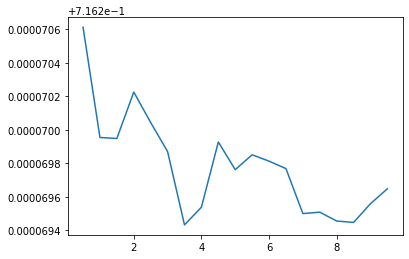

In [126]:
plt.plot(Cs, roc_auc_lr)

In [12]:
# убираем все что связано с героями и тип лобби
X = train.copy()

for column in X.columns:
    
    if 'hero' in column:
        
        X.drop(column, axis = 1, inplace = True)

X.drop('lobby_type', axis = 1, inplace = True)

In [130]:
# учимся опять (вообще по-хорошему надо было зафигачить функцию, но да ладно)

sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)
Cs = np.arange(0.5, 10, 0.5)
roc_auc_lr = []

for C in Cs:
    
    lr = linear_model.LogisticRegression(C = C, random_state = 1)
    
    start_time = datetime.datetime.now()
    
    k = model_selection.cross_val_score(estimator = lr, cv = cv, X = X, y = y, scoring = 'roc_auc')
    
    if int(C) == C:
        
        print('Regularization coef: {}. Time elapsed: {}'.format(round(C, 2), datetime.datetime.now() - start_time))
    
    roc_auc_lr.append(np.mean(k))

Regularization coef: 1.0. Time elapsed: 0:00:02.688544
Regularization coef: 2.0. Time elapsed: 0:00:02.691342
Regularization coef: 3.0. Time elapsed: 0:00:03.436998
Regularization coef: 4.0. Time elapsed: 0:00:03.012436
Regularization coef: 5.0. Time elapsed: 0:00:03.414887
Regularization coef: 6.0. Time elapsed: 0:00:03.247350
Regularization coef: 7.0. Time elapsed: 0:00:03.577767
Regularization coef: 8.0. Time elapsed: 0:00:03.509962
Regularization coef: 9.0. Time elapsed: 0:00:03.457344


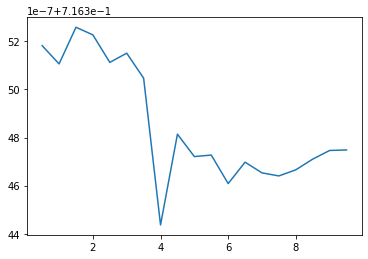

In [131]:
plt.plot(Cs, roc_auc_lr) 
# ну ничего не изменилось почти

In [13]:
# делаем Xs - массив, откуда убраны колонки типа hero и добавлен мешок слов

X_pick = np.zeros((train.shape[0], 112))

for i, match_id in enumerate(train.index):
    
    
    for p in range(5):
        
        X_pick[i, train.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
Xs = np.hstack((X, X_pick))

In [14]:
# три раза один и тот же код почти - ПРОСТИТЕ
Cs = np.arange(0.5, 10, 0.5)
roc_auc_lr = []
sc = preprocessing.StandardScaler()
cv = model_selection.KFold(random_state = 1, shuffle = True, n_splits = 5)
Xs = sc.fit_transform(Xs)

for C in Cs:
    
    lr = linear_model.LogisticRegression(C = C, random_state = 1)
    
    start_time = datetime.datetime.now()
    
    k = model_selection.cross_val_score(estimator = lr, cv = cv, X = Xs, y = y, scoring = 'roc_auc')
    
    if int(C) == C:
        
        print('Regularization coef: {}. Time elapsed: {}'.format(round(C, 2), datetime.datetime.now() - start_time))
    
    roc_auc_lr.append(np.mean(k))

Regularization coef: 1.0. Time elapsed: 0:00:05.725673
Regularization coef: 2.0. Time elapsed: 0:00:06.208383
Regularization coef: 3.0. Time elapsed: 0:00:06.230448
Regularization coef: 4.0. Time elapsed: 0:00:05.510252
Regularization coef: 5.0. Time elapsed: 0:00:05.758587
Regularization coef: 6.0. Time elapsed: 0:00:05.804465
Regularization coef: 7.0. Time elapsed: 0:00:05.702734
Regularization coef: 8.0. Time elapsed: 0:00:05.584052
Regularization coef: 9.0. Time elapsed: 0:00:05.509254


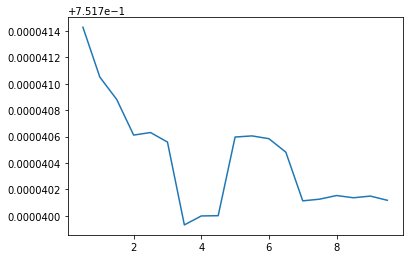

In [233]:
plt.plot(Cs, roc_auc_lr)
# качество выросло на 0.04, что очень неплохо

In [17]:
# так как последняя модель - лучшая, изменяем X_test (вводим мешок слов), обучаем старый Xs при C = 5 и делаем предсказание

X_test = test.copy()

for column in X_test.columns:
    
    if 'hero' in column:
        
        X_test.drop(column, axis = 1, inplace = True)

X_test.drop('lobby_type', axis = 1, inplace = True)
X_test.drop('start_time', axis = 1, inplace = True)

X_pick_test = np.zeros((test.shape[0], 112))

for i, match_id in enumerate(test.index):
    
    
    for p in range(5):
        
        X_pick_test[i, test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
Xs_test = np.hstack((X_test, X_pick_test))
sc = preprocessing.StandardScaler()
Xs_test = sc.fit_transform(Xs_test)

lr = linear_model.LogisticRegression(C = 5, random_state = 1)
lr.fit(Xs, y)
prediction = lr.predict_proba(Xs_test)[:, 1]

In [18]:
# а вот и результатики подъехали

result = test.copy()
result['Radiant win prediction'] = prediction
result = result.loc[:, 'Radiant win prediction']
result.head()

match_id
6     0.836341
7     0.779042
10    0.201028
13    0.867982
16    0.259158
Name: Radiant win prediction, dtype: float64

In [19]:
print(max(prediction), min(prediction))

0.9966533437552726 0.008614588504864287


(array([ 405., 1174., 1806., 2245., 2442., 2521., 2452., 2064., 1538.,
         530.]),
 array([0.00861459, 0.10741846, 0.20622234, 0.30502622, 0.40383009,
        0.50263397, 0.60143784, 0.70024172, 0.79904559, 0.89784947,
        0.99665334]),
 <a list of 10 Patch objects>)

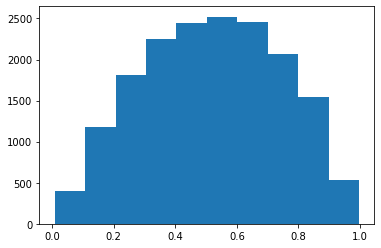

In [21]:
plt.hist(prediction)

# Отчет по 2 подходу

## 1:

Качество получилось примерно 0.716, что выше, чем у градиентного бустинга где-то на 0.02. Можно объяснить тем, что мы взяли слишком мало деревьев, либо что другие параметры бустинга не были оптимизированы. Третий вариант - регрессия работает лучше на вещественных, непрерывных признаках, чем деревья, которые аппроксимируют все это кусками.

## 2:

При удалении категориальных признаков качество почти не изменилось. Думаю проблема в том, что они изначально были плохо заданы: например, в пределах одной команды можно менять местами эти признаки - и ничего не поменяется. Плюс они в принципе были сделаны непрерывными, и глядя на данные, создавалось такое ощущение, что там просто рандомные числа от 1 до 113. И эти признаки кодируют по сути игроков, а не героев, и не отражают нормальным образом присутствия конкретного героя в данном матче.

## 3: 

Существует 112 идентификаторов. При использование nunique выдает в каждой колонке 108, но стоит учесть, что если герой взят один игроком - он не может быть взят другим. Так что еще плюс 4.

## 4:

При добавлении мешка слов качество улучшилось примерно на 0.04. Связано это с тем, что мы закодировали не игроков каким-то непонятным образом, а героев, что более разумно. Есть герои с более высоким winrate, есть с более низким.

## 5:

Максимум получился 0.996, минимум - 0.008. Действительно, иногда уже после 5 минут понятно, к чему все идет.